# Tercer parcial

#### Alumnos:
- Sebastian Jordan
- Daniel Oropeza
- Franz Vilela

In [71]:
%config IPCompleter.greedy = True
%autosave 60
%matplotlib inline

Autosaving every 60 seconds


## 1. Importar las librerias y cargar el archivo csv

In [147]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

pasajeros_titanic = pd.read_csv(os.path.join('.', 'train.csv'))
pasajeros_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


## 2. Visualizar los indicadores y los datos faltantes

In [148]:
pasajeros_titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,892.000000,892.000000,892.000000,892,892,715.000000,892.000000,892.000000,892,891.000000,204,890
unique,NaN,NaN,NaN,892,2,NaN,NaN,NaN,682,NaN,147,3
top,NaN,NaN,NaN,"Markoff, Mr. Marin",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,578,NaN,NaN,NaN,7,NaN,4,645
mean,446.670404,0.383408,2.309417,NaN,NaN,29.742196,0.522422,0.381166,NaN,32.204208,NaN,NaN
std,257.987535,0.486489,0.835923,NaN,NaN,14.561951,1.102264,0.805706,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.750000,0.000000,2.000000,NaN,NaN,20.250000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.500000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,669.250000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 3. Ver la matriz de correlación

In [1]:
pasajeros_titanic.corr()

NameError: name 'pasajeros_titanic' is not defined

## 4. Reemplazar los datos faltantes

### 4.1 Reemplazar los datos de la columna "Fare"

In [150]:
# Ver los datos faltantes
pasajeros_titanic.loc[pasajeros_titanic['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Recordemos que las columnas *SipSp* y *Parch* representan el número de parientes (esposos, hermanos, padres, hijos), o sea, si los pasajeros están viajando solos o no y con cuantos acomañantes.

La correlación entre Fare y Pclass es la más alta de todas (-0.549500 ). Sólo falta una fila y es de un pasajero que viaja en tercera clase (Pclass = 3) y viaja solo (SibSp = 0 y Parch = 0).

In [151]:
pasajeros_por_clase_y_por_numero_acompanantes = pasajeros_titanic.groupby(['Pclass', 'SibSp', 'Parch'])
mediana_fare_pasajeros = pasajeros_por_clase_y_por_numero_acompanantes['Fare'].transform('median')

# Reemplazar el dato faltante de Fare
pasajeros_titanic['Fare'].fillna(mediana_fare_pasajeros, inplace=True)

### 4.2 Reemplazar los datos de la columna "Embarked"

In [152]:
pasajeros_titanic.loc[pasajeros_titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### 4.3 Reemplazar los datos de la columna "Age"

In [155]:
pasajeros_titanic.loc[pasajeros_titanic['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Según la matriz de correlación, *Age* tiene la correlación más alta con *Pclass*. Entonces, agruparemos los datos según este parámetro. También los agruparemos según el sexo, o sea, que los datos estarán agrupados por clase y por sexo. Porque las edades de las personas pueden variar según su sexo.

In [3]:
pasajeros_por_clase_y_sexo = pasajeros_titanic.groupby(['Pclass', 'Sex'])
mediana_age_pasajeros = pasajeros_por_clase_y_sexo['Age'].transform('median')

# Reemplazar los datos nulos de Age
pasajeros_titanic['Age'].fillna(mediana_age_pasajeros, inplace=True)

NameError: name 'pasajeros_titanic' is not defined

### 4.4 Reemplazar los datos de la columna "Cabin"

In [156]:
pasajeros_titanic.loc[pasajeros_titanic['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


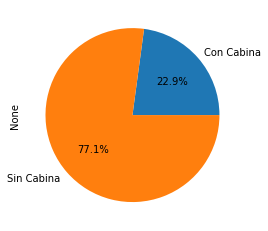

In [221]:
pasajeros_sin_cabina = pasajeros_titanic.loc[pasajeros_titanic['Cabin'].isnull()]
pasajeros_con_cabina = pasajeros_titanic.loc[pasajeros_titanic['Cabin'].notnull()]

valores = [pasajeros_con_cabina.size, pasajeros_sin_cabina.size]
pd.Series(valores, index =["Con Cabina", "Sin Cabina"]).plot.pie(autopct='%1.1f%%')

Como podemos observar, una gran mayoria de los datos (filas) no tiene la columna *Cabin*. Además que si observamos los datos, el valor de la cabina es una cadena que indica, probablemente, en qué cabina estaba el pasajero. Entonces es muy difícil determinar con qué valores se puede reemplazar los valores restantes. Por tanto, la mejor opción es eliminar la columna entera.

In [215]:
# pasajeros_titanic.drop(columns=['Cabin'], inplace=True)